<a href="https://colab.research.google.com/github/FIngul98/Credit_Default_Project/blob/main/Random_Forest_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction 

##### Dataset: https://www.kaggle.com/datasets/wordsforthewise/lending-club


### Import libraries 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [42]:
url = 'https://raw.githubusercontent.com/FIngul98/Loan_Dataset/main/loan_data.csv'
loan_data= pd.read_csv(url)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [43]:
# Dataframe cleanup
loan_data.columns = [c.replace('.', '_') for c in loan_data.columns]
loan_data.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis 


### Preprocessing

##### Label encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Encode loan purpose
le = LabelEncoder()
loan_data["purpose"] = le.fit_transform(loan_data["purpose"])

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Normalization


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Revolving balance doesn't follow normal distribution 
loan_data['revol_bal'] # SHOW OG DIST HERE

0        28854
1        33623
2         3511
3        33667
4         4740
         ...  
9573    215372
9574       184
9575     10036
9576         0
9577     37879
Name: revol_bal, Length: 9578, dtype: int64

In [48]:
# Normalize credit balance
scaler = MinMaxScaler()
loan_data['revol_bal'] = scaler.fit_transform(np.array(loan_data['revol_bal']).reshape(-1, 1))

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,0.023898,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,0.027848,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,0.002908,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,0.027885,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,0.003926,39.5,0,1,0,0


#### Standardization 

In [49]:
from sklearn.preprocessing import StandardScaler 

In [50]:
# Scale installment, annual income, dti, fico score, credit line duration, credit line utilization 
scaler = StandardScaler()
loan_data['installment'], loan_data['log_annual_inc'], loan_data['dti'], loan_data['fico'], loan_data['days_with_cr_line'], loan_data['revol_util'] = scaler.fit_transform(np.array(loan_data[['installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_util']]).reshape(6,-1))

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,-0.089626,-0.627493,2.195185,-0.520359,-0.636980,0.023898,-0.320727,0,0,0,0
1,1,1,0.1071,-0.715814,1.320048,-0.658891,-0.718089,1.503675,0.027848,-0.730929,0,0,0,0
2,1,2,0.1357,-0.632908,0.365403,-0.594614,-0.638418,2.087983,0.002908,-0.587446,1,0,0,0
3,1,2,0.1008,1.510397,-0.612407,-0.724671,1.310452,-0.756675,0.027885,-0.727096,1,0,0,0
4,1,1,0.1426,2.176642,-0.468629,-0.654269,0.029400,-0.425205,0.003926,-0.657939,0,1,0,0


#### Balancing 

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
# We create loan_ros for the after over-sampling data.
loan_ros = loan_data[['credit_policy', 'int_rate', 'installment',	'log_annual_inc', 'dti', 'fico', 'days_with_cr_line',	'revol_util',	'inq_last_6mths',	'delinq_2yrs', 'pub_rec', 'revol_bal', 'not_fully_paid']]
print(loan_ros['not_fully_paid'].value_counts(), "\n")

0    8045
1    1533
Name: not_fully_paid, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


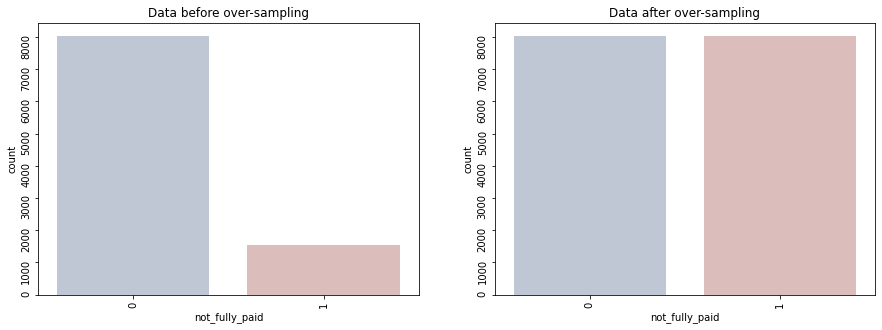

Data before over-sampling
0    8045
1    1533
Name: not_fully_paid, dtype: int64 

Data after over-sampling
0    8045
1    8045
Name: not_fully_paid, dtype: int64


In [53]:
# over-sampling. We define X and y for loan_ros using the iloc function.
X = loan_ros.iloc[:,:-1]
y = loan_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

loan_ros = x_ros
loan_ros['not_fully_paid'] = y_ros


#Now we want to visualize the after and before over-sampling data.
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not_fully_paid', data=loan_data, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not_fully_paid', data=loan_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(loan_data['not_fully_paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_ros['not_fully_paid'].value_counts())

### Modeling

#### Train-test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#Specifying what type of values our data set includes. This will make our fit and the RFE model easier
types = loan_ros.select_dtypes(['int64', 'float64', 'bool']).columns

In [56]:
#Here we are defining our model and reiterating the X and y features.
loan_model = loan_ros
X = loan_model.iloc[:,:-1].values
y = loan_model.iloc[:,-1].values

In [57]:
#When we were feature engineering the log_revol_bal would give us infinity values.
#The solution is to substitute with standardized value using the formula below
X = np.nan_to_num(X, posinf=True, neginf=True)

In [58]:
#Checking to see if we are still getting infinity values, which we are not!
mean = np.mean(X)
median = np.median(X)
max = np.max(X)
 
#print("Array =", X_test)
print("Mean =", mean)
print("Median =", median)
print("Max =", max)

Mean = 0.25069446052353694
Median = 0.0
Max = 33.0


In [59]:
#Here we are splitting the balanced data set to train the model on the new trained data set
#Further, we do not want to train the model on the new test set so we keep the old
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model 1: Random Forest 

#### Model training

In [60]:
#Importing RFE model
from sklearn.feature_selection import RFE

In [61]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [62]:
for i in range(1,13):

  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

  select.fit(X_train, y_train)

  mask = select.get_support()

  X_train_rfe = select.transform(X_train)
  X_test_rfe = select.transform(X_test)

  score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

  print("Test score: {:.3f}".format(score), " number of features: {}".format(i))
  #Here we are testing the number of features for our model to find the optimal combination.

Test score: 0.896  number of features: 1
Test score: 0.919  number of features: 2
Test score: 0.947  number of features: 3
Test score: 0.954  number of features: 4
Test score: 0.962  number of features: 5
Test score: 0.960  number of features: 6
Test score: 0.963  number of features: 7
Test score: 0.963  number of features: 8
Test score: 0.960  number of features: 9
Test score: 0.951  number of features: 10
Test score: 0.954  number of features: 11
Test score: 0.953  number of features: 12


In [63]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=8)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(8))

features = pd.DataFrame({'features':list(loan_data[types].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)

# We find that 8 features provide the highest test score!

Test score: 0.961  number of features: 8


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,revol_bal
select,False,True,True,True,True,True,True,True,False,False,False,True


The selected features are: 



['int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_util',
 'revol_bal']

#### Model prediction


In [64]:
# Predict target from test data 
y_pred = select.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

#### Model evaluation 

In [65]:
# import classification etrics 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix

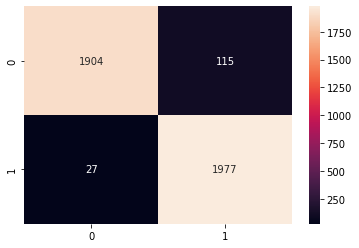

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2019
           1       0.95      0.99      0.97      2004

    accuracy                           0.96      4023
   macro avg       0.97      0.96      0.96      4023
weighted avg       0.97      0.96      0.96      4023



### Model 2: Logistic Regresssion 

#### Model training

In [68]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression(solver = 'liblinear', C=10, max_iter = 500) # WILL NEED TO HYPERPARAMETER TUNE TO GET RESULTS
lr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=500, solver='liblinear')

#### Model prediction 

In [86]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

#### Model evaluation

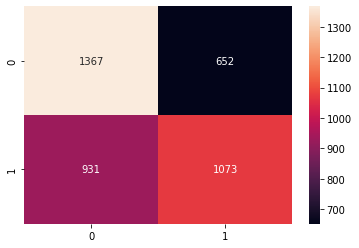

In [87]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      2019
           1       0.62      0.54      0.58      2004

    accuracy                           0.61      4023
   macro avg       0.61      0.61      0.60      4023
weighted avg       0.61      0.61      0.60      4023



## Results



* <sub> Random Forest Model Precision 0.97, Recall 0.96 </sub> 
* <sub> Logistic Regression Model Precision 0.61, Recall 0.61 </sub> 

Both model results are much better than our performance metrics of 70% recall and 90% precision!
